In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#Для красивых графиков
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot') 

In [21]:
font = ({'family': 'Verdana'})

In [22]:
matplotlib.rc('font', **font)

Импорт данных HeadHunter'а из 5 файлов

In [23]:
df = pd.DataFrame.from_csv('data/part1.csv')
df = df.append(pd.DataFrame.from_csv('data/part2.csv'))
df = df.append(pd.DataFrame.from_csv('data/part3.csv'))
df = df.append(pd.DataFrame.from_csv('data/part4.csv'))
df = df.append(pd.DataFrame.from_csv('data/part5.csv'))
df = pd.DataFrame.from_csv('data/CS.csv')

Импорт КЛАДР'а

In [24]:
Cities = pd.DataFrame.from_csv('data/kladr.csv')
Temp = pd.DataFrame.from_csv('data/kladr_2.csv')

In [25]:
Cities = Cities.append(Temp)
del(Temp)

In [26]:
def GetFinishIndexFromData(Data):
    FinishIndex = Data.find('не требуется')
    if FinishIndex != -1:
        return FinishIndex
    else:
        FinishIndex = Data.find('требуется')
        if FinishIndex != -1:
            return FinishIndex
        else:
            FinishIndex = Data.find('более')
            if FinishIndex != -1:
                return FinishIndex
    Min = 9999
    for i in range(10):
        Index = Data.find(str(i))
        if Index != -1 and Index < Min:
            Min = Index
    return Min

Получение названия города и проверка на принадлежность к РФ

In [27]:
def CityParse(Data):
    Dt = Data
    __Start1 = 'з/п не указана'
    __Start2 = 'руб.'
    StartIndex = Data.find(__Start1) + len(__Start1)
    if StartIndex < len(__Start1):
        StartIndex = Data.find(__Start2) + len(__Start2)
        if StartIndex < len(__Start2) or Data.find('бел.') != -1:
            return np.nan
    Data = Data[StartIndex:len(Data)]
    Data = Data[0:GetFinishIndexFromData(Data)].strip()
    if ',' in list(Data):
        Data = Data[0:Data.find(',')].strip()
        if Data in Cities.name.values:
            return Cities[Cities['name'] == Data]['region_wikiname'].values[0]
        else:
            return np.nan
    elif '(' in list(Data):
        Data = Data[0:Data.find('(')].strip()
        if Data in Cities.name.values:
            return Cities[Cities['name'] == Data]['region_wikiname'].values[0]
        else:
            return np.nan
    else:
        if Data in Cities.name.values:
            return Cities[Cities['name'] == Data]['region_wikiname'].values[0]
        else:
            return np.nan

Получение данных о зарплате

In [28]:
def SalaryParse(Data):
    __Start1 = 'опыт работы'
    if Data.find('з/п не указана') != -1:
        return 'з/п не указана'
    else:
        StartIndex = Data.find(__Start1) + len(__Start1)
        FinishIndex = Data.find('руб.') + 4
        print()
        return Data[StartIndex:FinishIndex]

Перевод зарплаты в int

In [29]:
def GetSalary(Data):
    if Data == 'з/п не указана':
        return 0
    else:
        try:
            Data = Data.replace(u'\xa0', u' ')
            Index = Data.find('до')
            if Index != -1:
                List = Data.split()
                return int(List[1]+List[2])
            else:
                List = Data.split()
                return int(List[1]+List[2])
        except:
            return 0

Проверка вакансии на принадлежность к IT

In [30]:
def GetITVacancy(Data):
    if Data.find('Developer') != -1 or Data.find('developer') != -1 or Data.find('разработчик') != -1 or Data.find('Разработчик') != -1 or Data.find('software') != -1 or Data.find('программист') != -1 or Data.find('Программист') != -1 or Data.find('IT') != -1:
        return 1
    else:
        return np.nan

In [697]:
%%time
df['city'] = df['meta'].apply(lambda x: CityParse(x))

CPU times: user 12min 39s, sys: 348 ms, total: 12min 39s
Wall time: 12min 39s


In [698]:
del(df['skilles'])

In [699]:
df.dropna(inplace=True)

In [700]:
df['salary'] = df['meta'].apply(lambda x: SalaryParse(x))

In [701]:
df

,adress,created_at,description,group,meta,profareas,similar_title,similar_vac,title,work_hours,zanyatosty,city,salary
1,"<time class=""vacancy-sidebar__publication-date...",удаленная работа,"<div class=""b-vacancy-desc-wrapper"" itemprop=""...",ИП Donnikev,Уровень зарплатыГородТребуемый опыт работы з/п...,"[<span class=""bloko-tag bloko-tag_inline Bloko...","<div class=""vacancy-similar__title"">Работодате...","<div class=""vacancy-similar vacancy-similar_fu...",Агент по рекламеВакансия в архиве,Полная занятость,Агент по рекламе. Работа в офисе крупной комме...,Тамбовская область,з/п не указана
3,"<time class=""vacancy-sidebar__publication-date...",удаленная работа,"<div class=""b-vacancy-desc-wrapper"" itemprop=""...",ИП Donnikev,Уровень зарплатыГородТребуемый опыт работы з/п...,"[<span class=""bloko-tag bloko-tag_inline Bloko...","<div class=""vacancy-similar__title"">Работодате...","<div class=""vacancy-similar vacancy-similar_fu...",Агент по рекламеВакансия в архиве,Полная занятость,Агент по рекламе. Работа в офисе крупной комме...,Пермский край,з/п не указана
9,"<time class=""vacancy-sidebar__publication-date...",удаленная работа,"<div class=""b-vacancy-desc-wrapper"" itemprop=""...",ИП Donnikev,Уровень зарплатыГородТребуемый опыт работы з/п...,"[<span class=""bloko-tag bloko-tag_inline Bloko...","<div class=""vacancy-similar__title"">Работодате...","<div class=""vacancy-similar vacancy-similar_fu...",Агент по рекламеВакансия в архиве,Полная занятость,Агент по рекламе. Работа в офисе крупной комме...,Тульская область,з/п не указана
15,"<time class=""vacancy-sidebar__publication-date...",сменный график,"<div class=""b-vacancy-desc-wrapper"" itemprop=""...",Фэмили,Уровень зарплатыГородТребуемый опыт работыот 1...,[],"<div class=""vacancy-similar__title"">Работодате...","<div class=""vacancy-similar vacancy-similar_fu...",Заместитель директора (г.Новоалтайск)Вакансия ...,Полная занятость,Обязанности: Организация работы магазина Орга...,Алтайский край,от 18 000 руб.
16,"<time class=""vacancy-sidebar__publication-date...",полный день,"<div class=""b-vacancy-desc-wrapper"" itemprop=""...",ООО Интер-Маркет,Уровень зарплатыГородТребуемый опыт работыот 2...,[],"<div class=""vacancy-similar__title"">Работодате...","<div class=""vacancy-similar vacancy-similar_fu...",Менеджер по работе с клиентамиВакансия в архиве,Полная занятость,Обязанности: работа с действующей клиентской ...,Пермский край,от 20 000 руб.
17,"<time class=""vacancy-sidebar__publication-date...",полный день,"<div class=""b-vacancy-desc-wrapper"" itemprop=""...","ЛАМА, Группа компаний",Уровень зарплатыГородТребуемый опыт работы з/п...,[],"<div class=""vacancy-similar__title"">Работодате...","<div class=""vacancy-similar vacancy-similar_fu...",Менеджер-аналитикВакансия в архиве,Полная занятость,Менеджер-аналитик Должностные обязанности: ...,Томская область,з/п не указана
18,"<time class=""vacancy-sidebar__publication-date...",гибкий график,"<div class=""b-vacancy-desc-wrapper"" itemprop=""...",ИП Игнатова Надежда Вячеславовна,Уровень зарплатыГородТребуемый опыт работыот 1...,[],"<div class=""vacancy-similar__title"">Работодате...","<div class=""vacancy-similar vacancy-similar_fu...",Консультант по продажамВакансия в архиве,Частичная занятость,Требования: Пользователь ПК: Microsoft Excel‚...,Республика Башкортостан,от 18 000 руб.
19,"<time class=""vacancy-sidebar__publication-date...",полный день,"<div class=""b-vacancy-desc-wrapper"" itemprop=""...",ООО сервисное локомотивное депо Иваново,Уровень зарплатыГородТребуемый опыт работыот 2...,[],"<div class=""vacancy-similar__title"">Работодате...","<div class=""vacancy-similar vacancy-similar_fu...",Ведущий специалистВакансия в архиве,Полная занятость,Обязанности: организация работы группы по упр...,Ленинградская область,от 27 000 до 30 000 руб.
20,"<time class=""vacancy-sidebar__publication-date...",полный день,"<div class=""b-vacancy-desc-wrapper"" itemprop=""...",НИТУ МИСиС,Уровень зарплатыГородТребуемый опыт работыот 

In [31]:
df['salary_int'] = df['salary'].apply(lambda x: GetSalary(x))

In [32]:
Users = df[df['salary_int'] != 0]

In [33]:
Users['IT'] = Users['title'].apply(lambda x: GetITVacancy(x))

/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
IT = Users.dropna()

In [35]:
IT.head(10).title.values

array(['Front End Developer (AngularJS)',
       'Инженер-программист группы разработкиВакансия в архиве',
       'Программист 1 СВакансия в архиве',
       'Разработчик .NETВакансия в архиве',
       'WEB разработчикВакансия в архиве',
       'Android-разработчик в американский Ai-стартапВакансия в архиве',
       'Программист С++Вакансия в архиве',
       'IOS – разработчик (junior)Вакансия в архиве',
       'IOS – разработчик (Middle / Senior)Вакансия в архиве',
       'ПрограммистВакансия в архиве'], dtype=object)

In [36]:
IT.to_csv('data/IT.csv')

Подготовка данных для визуализации

In [37]:
ResIT = IT.groupby('city')['salary_int'].count()/IT.groupby('city')['salary_int'].agg(np.average)
ResIT = ResIT.reset_index()
ResIT.columns = ['region', 'coefficient(IT)']

In [38]:
AverageIT = IT.groupby('city')['salary_int'].agg(np.average)
AverageIT = AverageIT.reset_index()
AverageIT.columns = ['region', 'average salary(IT)']

In [39]:
VacCountIT = IT.groupby('city')['salary_int'].count()
VacCountIT = VacCountIT.reset_index()
VacCountIT.columns = ['region', 'number of vacancies(IT)']

In [40]:
Res = Users.groupby('city')['salary_int'].count()/Users.groupby('city')['salary_int'].agg(np.average)
Res = Res.reset_index()
Res.columns = ['region', 'coefficient']

In [41]:
Average = Users.groupby('city')['salary_int'].agg(np.average)
Average = Average.reset_index()
Average.columns = ['region', 'average salary']

In [42]:
VacCount = Users.groupby('city')['salary_int'].count()
VacCount = VacCount.reset_index()
VacCount.columns = ['region', 'number of vacancies']

In [43]:
VacCount = VacCount.sort_values('number of vacancies', ascending=False)
Average = Average.sort_values('average salary', ascending=False)
Res = Res.sort_values('coefficient')
VacCountIT = VacCountIT.sort_values('number of vacancies(IT)', ascending=False)
AverageIT = AverageIT.sort_values('average salary(IT)', ascending=False)
ResIT = ResIT.sort_values('coefficient(IT)')

Визуализация

In [45]:
VacCount.head(5)

,region,number of vacancies
42,Псковская область,4546
30,Московская область,2115
62,Санкт-Петербург,1849
59,Ростовская область,812
40,Пермский край,810
22,Краснодарский край,764
26,Ленинградская область,725
33,Нижегородская область,705
56,Республика Татарстан,663
35,Новосибирская область,657


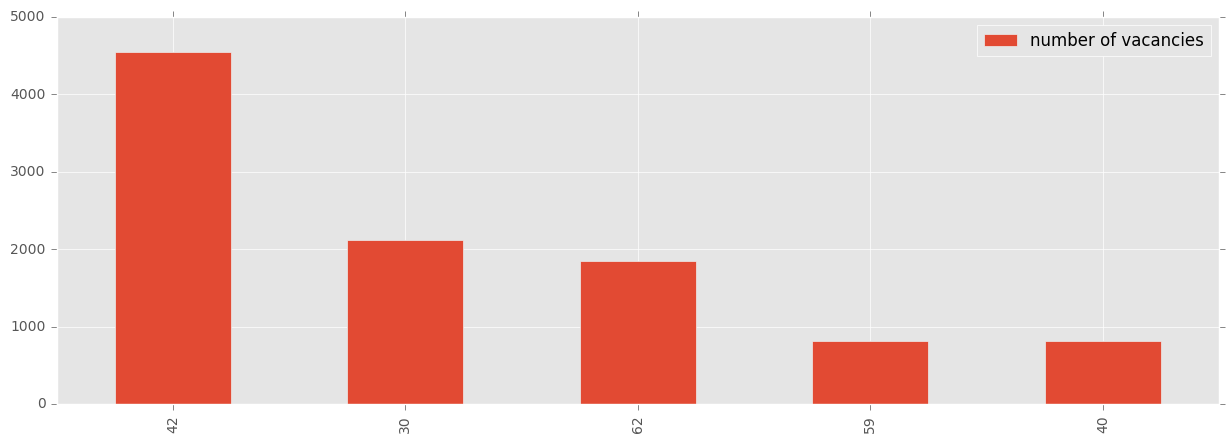

In [46]:
VacCount.head(5).plot(y='number of vacancies', kind='bar')

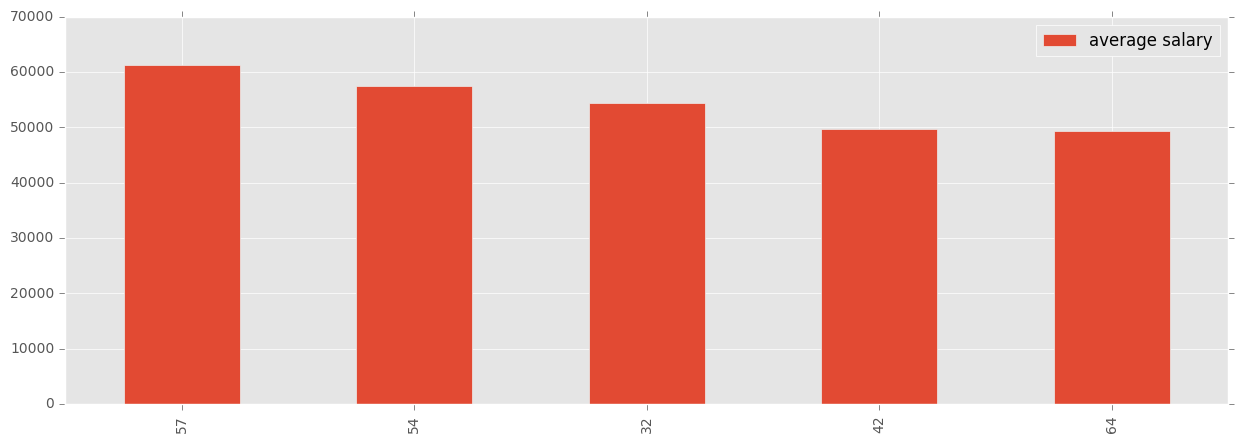

In [47]:
Average.head(5).plot(y='average salary', kind='bar')

In [48]:
Average.head(5)

,region,average salary
57,Республика Тыва,61250.000000
54,Республика Саха (Якутия),57413.333333
32,Ненецкий автономный округ,54355.555556
42,Псковская область,49741.573031
64,Сахалинская область,49404.761905


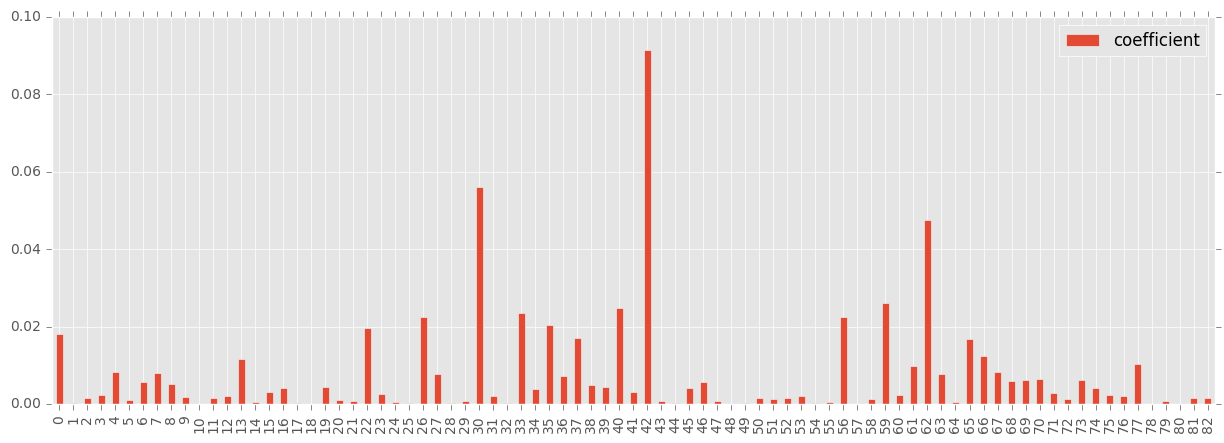

In [25]:
Res.plot(y='coefficient', kind='bar')

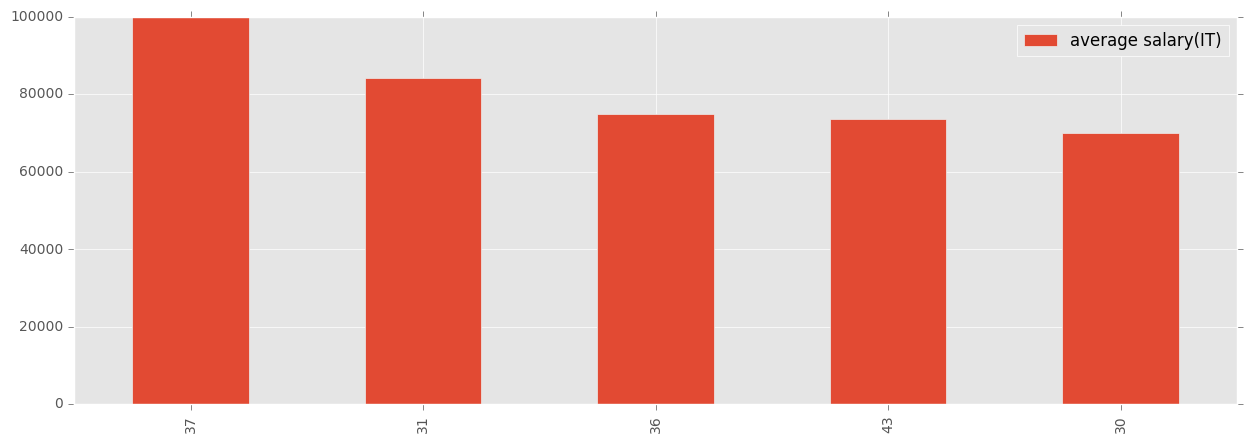

In [49]:
AverageIT.head(5).plot(y='average salary(IT)', kind='bar')

In [50]:
AverageIT.head(5)

,region,average salary(IT)
37,Республика Марий Эл,100000.000000
31,Псковская область,84104.712042
36,Республика Коми,75000.000000
43,Санкт-Петербург,73703.703704
30,Приморский край,70000.000000


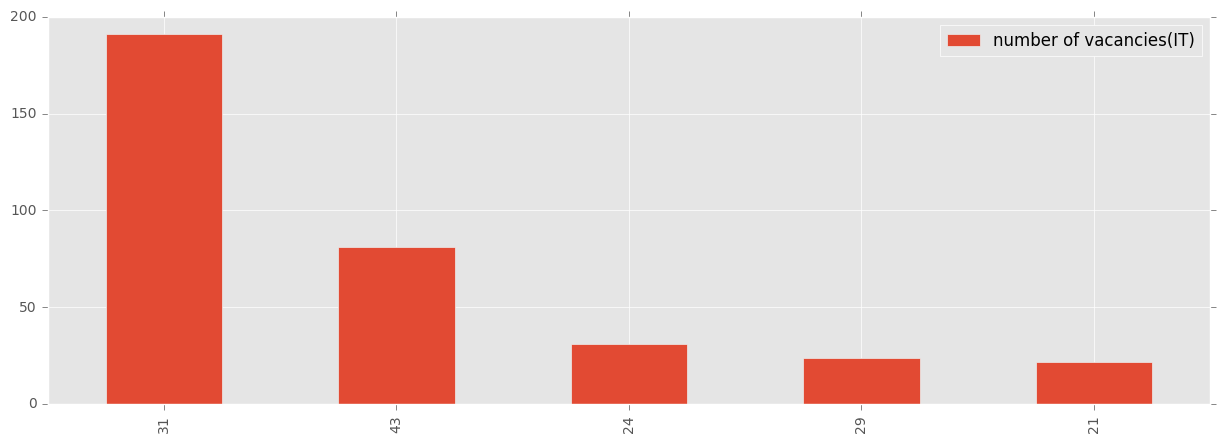

In [51]:
VacCountIT.head(5).plot(y='number of vacancies(IT)', kind='bar')

In [52]:
VacCountIT.head(5)

,region,number of vacancies(IT)
31,Псковская область,191
43,Санкт-Петербург,81
24,Новосибирская область,31
29,Пермский край,24
21,Московская область,22


In [27]:
VacCountIT.sort_values('number of vacancies(IT)', ascending=False)

,region,number of vacancies(IT)
31,Псковская область,191
43,Санкт-Петербург,81
24,Новосибирская область,31
29,Пермский край,24
21,Московская область,22
40,Ростовская область,20
16,Краснодарский край,18
50,Томская область,17
39,Республика Татарстан,17
18,Ленинградская область,17


In [35]:
Regions = Average['region']
Regions = Regions.reset_index()
del(Regions['index'])

In [36]:
Regions = pd.merge(left=Regions, right=VacCountIT, on='region', how='left')
Regions = pd.merge(left=Regions, right=VacCount, on='region', how='left')
Regions = pd.merge(left=Regions, right=AverageIT, on='region', how='left')
Regions = pd.merge(left=Regions, right=Average, on='region', how='left')
Regions.columns = ['region', 'number of IT vacancies', 'number of vacancies', 'average salary(IT)', 'average salary']
Regions['coeff'] = Regions['number of vacancies']//Regions['number of IT vacancies']

In [37]:
Regions = Regions.sort_values('coeff')

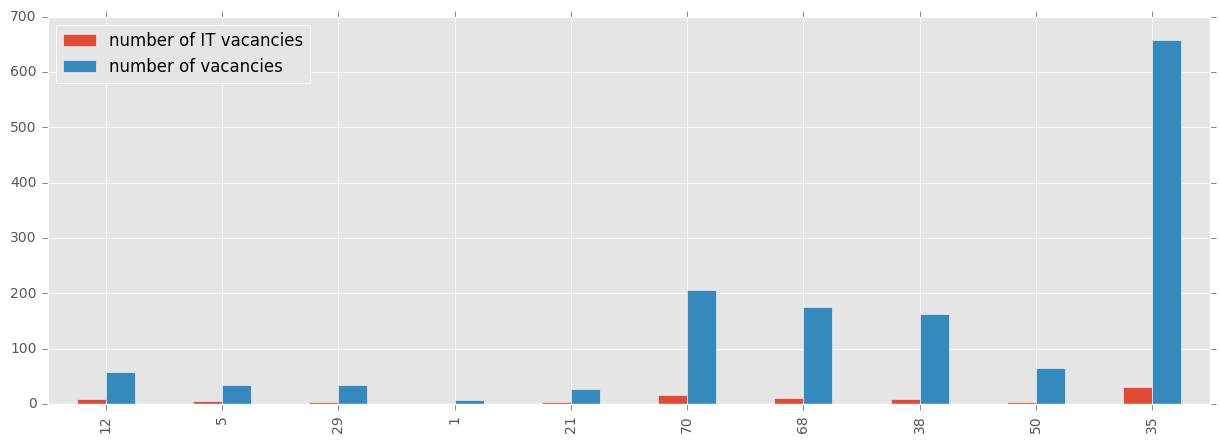

In [38]:
Regions.head(10).plot(y=['number of IT vacancies', 'number of vacancies'], kind='bar')

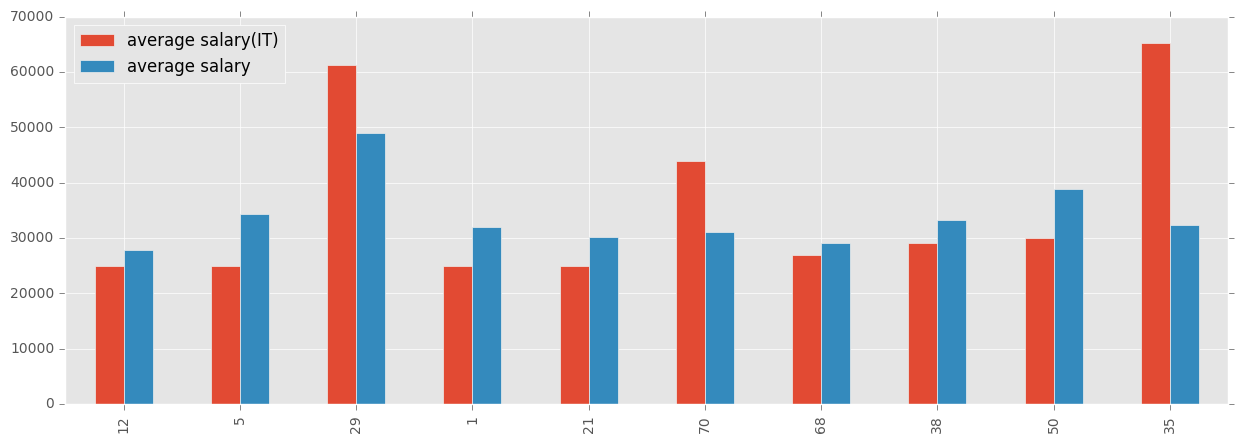

In [39]:
Regions.head(10).plot(y=['average salary(IT)', 'average salary'], kind='bar')

In [40]:
Regions

,region,number of IT vacancies,number of vacancies,average salary(IT),average salary,coeff
12,Ивановская область,9.0,58,25000.000000,27870.689655,6.0
5,Брянская область,5.0,35,25000.000000,34428.571429,7.0
29,Москва,4.0,35,61250.000000,48914.285714,8.0
1,Амурская область,1.0,8,25000.000000,32000.000000,8.0
21,Костромская область,3.0,27,25000.000000,30111.111111,9.0
70,Томская область,17.0,206,43882.352941,31152.427184,12.0
68,Тамбовская область,11.0,175,26909.090909,29095.600000,15.0
38,Орловская область,9.0,163,29111.111111,33209.815951,18.0
50,Республика Карелия,3.0,65,30000.000000,38861.538462,21.0
35,Новосибирская область,31.0,657,65161.290323,32308.033486,21.0
